# Payment Date Prediction 


### Importing related Libraries 

In [345]:

import numpy as np
import pandas as pd
import datetime


### Store the dataset into the Dataframe


In [346]:
data= (pd.DataFrame(pd.read_csv('dataset.csv')))
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


### Check the shape of the dataframe


In [347]:
data.shape

(50000, 19)

### Check the Detail information of the dataframe

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [349]:
# pd.set_option('display.max_columns', None)
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [350]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [351]:
data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [352]:
total = data.isnull().sum()*100
percent = (total/data['invoice_id'].count())
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
business_code,0,0.000000
cust_number,0,0.000000
name_customer,0,0.000000
clear_date,1000000,20.002400
buisness_year,0,0.000000
doc_id,0,0.000000
posting_date,0,0.000000
document_create_date,0,0.000000
document_create_date.1,0,0.000000
due_in_date,0,0.000000


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [353]:
df=pd.DataFrame(data)
df[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [354]:
# df=pd.DataFrame(data)
df[['baseline_create_date',"document_create_date",'document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Please check, Column 'posting_id' is constant columns or not


In [355]:
def constant_value_features(df):
    return [e for e in df.posting_id if df[e].nunique() == 1]
    
print(bool(constant_value_features))

True


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [356]:
def constant_value_features(df):
    return [e for e in df.isOpen if df[e].nunique() == 1]
    
print(bool(constant_value_features))

True


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [357]:
data.drop(['area_business',
"posting_id",
"invoice_id",
"document_create_date",
"isOpen",
'document type',
'document_create_date.1'],inplace=True,axis = 1)


### Please check from the dataframe whether all the columns are removed or not 

In [358]:
if set(['area_business',
"posting_id",
"invoice_id",
"document_create_date",
"isOpen",
'document type',
'document_create_date.1']).issubset(data.columns):
    print("Yes")
else:
    print("No")

No


### Show all the Duplicate rows from the dataframe

In [359]:
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Duplicate Rows

In [360]:
data.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [361]:
data.drop_duplicates(inplace=True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [362]:
data.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [363]:
shape = data.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (48839, 12)

Number of rows : 48839

Number of columns : 12


### Find out the total count of null values in each columns

In [364]:
data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [365]:
dataTypeSeries = data.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [366]:
dataTypeSeries = data.dtypes['clear_date']
print('clear_date datatypes :',dataTypeSeries)
dataTypeSeries = data.dtypes['posting_date']
print('posting_date datatypes :',dataTypeSeries)
dataTypeSeries = data.dtypes['due_in_date']
print('due_in_date datatypes :',dataTypeSeries)
dataTypeSeries = data.dtypes['baseline_create_date']
print('baseline_create_date datatypes :',dataTypeSeries)

clear_date datatypes : object
posting_date datatypes : object
due_in_date datatypes : float64
baseline_create_date datatypes : float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [367]:
data['clear_date']= pd.to_datetime(data['clear_date']) 
data['posting_date']= pd.to_datetime(data['posting_date'])
data['due_in_date']= pd.to_datetime(data['due_in_date']) 
data['baseline_create_date']= pd.to_datetime(data['baseline_create_date'])

### Please check the datatype of all the columns after conversion of the above 4 columns

In [368]:
dataTypeSeries = data.dtypes['clear_date']
print('clear_date datatypes :',dataTypeSeries)
dataTypeSeries = data.dtypes['posting_date']
print('posting_date datatypes :',dataTypeSeries)
dataTypeSeries = data.dtypes['due_in_date']
print('due_in_date datatypes :',dataTypeSeries)
dataTypeSeries = data.dtypes['baseline_create_date']
print('baseline_create_date datatypes :',dataTypeSeries)

clear_date datatypes : datetime64[ns]
posting_date datatypes : datetime64[ns]
due_in_date datatypes : datetime64[ns]
baseline_create_date datatypes : datetime64[ns]


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [369]:
print(data['invoice_currency'].value_counts())

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64


#### display the "total_open_amount" column value

In [ ]:
print("total_open_amount")
data["total_open_amount"].tolist()

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [371]:
for column in['invoice_currency','total_open_amount']:
    data.loc[data['invoice_currency']=='CAD','converted_amount'] = data['total_open_amount']*0.7 
    data.loc[data['invoice_currency']=='USD','converted_amount'] = data['total_open_amount']

data['converted_amount']

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_amount, Length: 48839, dtype: float64

### Display the new "converted_usd" column values

In [372]:
data["converted_usd"] = data["converted_amount"]
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_amount,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,USD,54273.28,1970-01-01 00:00:00.020200126,NAH4,54273.28,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,USD,79656.60,1970-01-01 00:00:00.020190722,NAD1,79656.60,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,USD,2253.86,1970-01-01 00:00:00.020190914,NAA8,2253.86,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,CAD,3299.70,1970-01-01 00:00:00.020200331,CA10,2309.79,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,USD,33133.29,1970-01-01 00:00:00.020191113,NAH4,33133.29,33133.29


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [373]:
print(data['buisness_year'].value_counts())

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64


### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [374]:
data = data.drop(columns = ['invoice_currency','total_open_amount'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_amount,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.28,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.60,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.86,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.29,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,1970-01-01 00:00:00.020200506,1970-01-01 00:00:00.020200421,NAA8,3187.86,3187.86
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,1970-01-01 00:00:00.020190830,1970-01-01 00:00:00.020190815,NAH4,6766.54,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,1970-01-01 00:00:00.020200305,1970-01-01 00:00:00.020200219,NAA8,6120.86,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,1970-01-01 00:00:00.020191212,1970-01-01 00:00:00.020191127,NAA8,63.48,63.48


### Write a code to check the number of columns in dataframe

In [375]:

df=pd.DataFrame(data)
df.shape


(48839, 12)

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [376]:
null_vals = df.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]
# null_features = null_vals.index
null_vals

,NULL_COUNTS
clear_date,9681


#### Find out the number of null values from the column that you got from the above code

In [377]:
null_vals = df.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]
null_features = null_vals.index
null_vals

,NULL_COUNTS
clear_date,9681


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [378]:
maindata=df.loc[df['clear_date'].isnull()==False]
nulldata=df.loc[df['clear_date'].isnull()==True]

### Check the number of Rows and Columns for both the dataframes 

In [379]:
maindata.shape

(39158, 12)

In [380]:
nulldata.shape

(9681, 12)

### Display the 5 records from maindata and nulldata dataframes

In [381]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_amount,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088,15558.088


In [382]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_amount,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,1970-01-01 00:00:00.020200410,1970-01-01 00:00:00.020200331,CA10,2309.79,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,1970-01-01 00:00:00.020200403,1970-01-01 00:00:00.020200319,NAA8,11173.02,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,1970-01-01 00:00:00.020200326,1970-01-01 00:00:00.020200311,NAA8,3525.59,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,1970-01-01 00:00:00.020200430,1970-01-01 00:00:00.020200415,NAA8,121105.65,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,1970-01-01 00:00:00.020200426,1970-01-01 00:00:00.020200416,NAM2,3726.06,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [384]:

maindata['Delay']=maindata["clear_date"]-maindata["due_in_date"]
print(maindata['Delay'])



0       18302 days 23:59:59.979799790
1       18115 days 23:59:59.979809189
2       18259 days 23:59:59.979809071
4       18224 days 23:59:59.979808872
5       18233 days 23:59:59.979808996
                     ...             
49994   18101 days 23:59:59.979809275
49996   18141 days 23:59:59.979809170
49997   18325 days 23:59:59.979799695
49998   18241 days 23:59:59.979808788
49999   17910 days 23:59:59.979809876
Name: Delay, Length: 39158, dtype: timedelta64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [385]:
avg_delay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
avg_delay

name_customer
11078 us               18017 days 23:59:59.979809536
17135 associates       18190 days 23:59:59.979809024
17135 llc              18311 days 23:59:59.979799808
236008 associates      18224 days 23:59:59.979808768
99 CE                  18305 days 11:59:59.979799808
                                    ...             
YEN BROS corp          18333 days 23:59:59.979799808
YEN BROS corporation   18151 days 23:59:59.979809024
YEN BROS llc           18164 days 23:59:59.979809024
ZARCO co               18037 days 23:59:59.979809536
ZIYAD  us              18112 days 23:59:59.979809280
Name: Delay, Length: 3889, dtype: timedelta64[ns]

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [386]:
maindata['avg_delay']=maindata['name_customer'].map(avg_delay)
# maindata['name_customer'].map(avg_delay)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [387]:
# maindata['avg_delay']= pd.to_timedelta(maindata['avg_delay'])
maindata['avg_delay']=maindata['avg_delay'].dt.seconds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Display the maindata dataframe 

In [388]:
display(maindata)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_amount,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,1970-01-01 00:00:00.020200210,1970-01-01 00:00:00.020200126,NAH4,54273.280,54273.280,18302 days 23:59:59.979799790,32337
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,1970-01-01 00:00:00.020190811,1970-01-01 00:00:00.020190722,NAD1,79656.600,79656.600,18115 days 23:59:59.979809189,86399
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,1970-01-01 00:00:00.020190929,1970-01-01 00:00:00.020190914,NAA8,2253.860,2253.860,18259 days 23:59:59.979809071,39272
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,1970-01-01 00:00:00.020191128,1970-01-01 00:00:00.020191113,NAH4,33133.290,33133.290,18224 days 23:59:59.979808872,80169
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,1970-01-01 00:00:00.020191004,1970-01-01 00:00:00.020190924,CA10,15558.088,15558.088,18233 days 23:59:59.979808996,47999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,1970-01-01 00:00:00.020190725,1970-01-01 00:00:00.020190710,NAC6,84780.400,84780.400,18101 days 23:59:59.979809275,14399
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,1970-01-01 00:00:00.020190830,1970-01-01 00:00:00.020190815,NAH4,6766.540,6766.540,18141 days 23:59:59.979809170,17423
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,1970-01-01 00:00:00.020200305,1970-01-01 00:00:00.020200219,NAA8,6120.860,6120.860,18325 days 23:59:59.979799695,82285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,1970-01-01 00:00:00.020191212,1970-01-01 00:00:00.020191127,NAA8,63.480,63.480,18241 days 23:59:59.979808788,59964


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [389]:
maindata.drop(['Delay', 'clear_date'],inplace=True,axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [390]:
X=maindata.drop('avg_delay',axis=1)


In [391]:
y=maindata[['avg_delay']]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [392]:
from sklearn.model_selection import train_test_split
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y,test_size=0.4,random_state=42)
# X, y = train_test_split(maindata, test_size=0.4)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [393]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((23494, 11), (15664, 11), (23494, 1), (15664, 1))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [394]:
# from sklearn.model_selection import train_test_split(X_loc_test,y_loc_test)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=50, random_state=50)

### Please check for the number of rows and columns of all the 4 dataframes 

In [395]:
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((39108, 11), (50, 11), (39108, 1), (50, 1))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


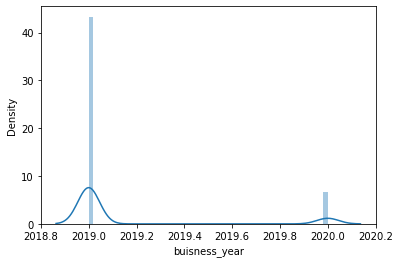

In [396]:
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.distplot(X_train['buisness_year'])

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [397]:
X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

,name_customer,doc_id
0,11078 us,1
1,17135 llc,1
2,99 CE,1
3,99 CE associates,1
4,99 CE co,1
...,...,...
3070,YEN BROS co,1
3071,YEN BROS corporation,2
3072,YEN BROS llc,1
3073,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


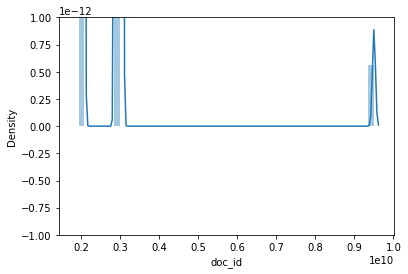

In [398]:
sns.distplot(X_train['doc_id'])


#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


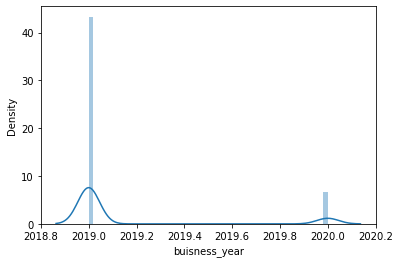

In [399]:
sns.distplot(X_train['buisness_year'])


In [ ]:
sns.distplot(X_train[x='buisness_year'],X_train[y='doc_id'])

SyntaxError: ignored

# Feature Engineering 

### Display and describe the X_train dataframe 

In [400]:
display(X_train)

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_amount,converted_usd
44556,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,1970-01-01 00:00:00.020190705,1970-01-01 00:00:00.020190620,NAA8,54315.10,54315.10
36713,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,1970-01-01 00:00:00.020200207,1970-01-01 00:00:00.020200123,NAA8,52725.92,52725.92
2639,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,1970-01-01 00:00:00.020190214,1970-01-01 00:00:00.020190130,NAAX,21126.47,21126.47
49682,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,1970-01-01 00:00:00.020200115,1970-01-01 00:00:00.020191231,NAA8,143649.72,143649.72
45201,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,1970-01-01 00:00:00.020191002,1970-01-01 00:00:00.020190917,NAH4,14864.00,14864.00
...,...,...,...,...,...,...,...,...,...,...,...
7745,U013,0140103699,L&E IN,2019.0,1.991835e+09,2019-11-15,1970-01-01 00:00:00.020191215,1970-01-01 00:00:00.020191115,NAVE,20131.46,20131.46
14076,U001,0200900909,SYSCO co,2019.0,1.929117e+09,2019-04-12,1970-01-01 00:00:00.020190427,1970-01-01 00:00:00.020190412,NAA8,2363.61,2363.61
48693,U001,0200769623,WAL-MAR trust,2020.0,1.930413e+09,2020-01-20,1970-01-01 00:00:00.020200204,1970-01-01 00:00:00.020200120,NAH4,6663.73,6663.73
1054,U001,0200764795,SYSCO associates,2019.0,1.929948e+09,2019-10-03,1970-01-01 00:00:00.020191018,1970-01-01 00:00:00.020191003,NAA8,3010.12,3010.12


In [401]:
X_train.describe()

,buisness_year,doc_id,converted_amount,converted_usd
count,23494.000000,2.349400e+04,23494.000000,23494.000000
mean,2019.134077,2.011913e+09,30618.192289,30618.192289
std,0.340742,2.852458e+08,36500.609654,36500.609654
min,2019.000000,1.928502e+09,0.790000,0.790000
25%,2019.000000,1.929174e+09,4569.665750,4569.665750
50%,2019.000000,1.929732e+09,16795.265000,16795.265000
75%,2019.000000,1.930209e+09,45472.520500,45472.520500
max,2020.000000,9.500000e+09,668593.360000,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [402]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [403]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [404]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [405]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
44556,U001,1
36713,U001,1
2639,U001,1
49682,U001,1
45201,U001,1
...,...,...
7745,U013,5
14076,U001,1
48693,U001,1
1054,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [411]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [413]:
X_train ,X_val ,X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [414]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [415]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [416]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [417]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [418]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [419]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [420]:
X_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_amount                 float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [421]:
X_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_amount                 float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [422]:
X_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_amount                 float64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [423]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [424]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [427]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [428]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [429]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month-of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year-of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day-of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [431]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [432]:
X_train.dtypes ,X_val.dtypes, X_test.dtypes

(cust_number                        int64
 buisness_year                    float64
 doc_id                           float64
 converted_amount                 float64
 converted_usd                    float64
 business_code_enc                  int64
 name_customer_enc                  int64
 cust_payment_terms_enc             int64
 day_of_postingdate                 int64
 month_of_postingdate               int64
 year_of_postingdate                int64
 day_of_baseline_create_date        int64
 month_of_baseline_create_date      int64
 year_of_baseline_create_date       int64
 day_of_due_in_date                 int64
 month-of_due_in_date               int64
 year-of_due_in_date                int64
 dtype: object, cust_number                        int64
 buisness_year                    float64
 doc_id                           float64
 converted_amount                 float64
 converted_usd                    float64
 business_code_enc                  int64
 name_customer_enc 

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [434]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

11

- Note - Keep the code as it is, no need to change 


In [435]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

6


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [436]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

5


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [437]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [438]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.8)

['year_of_postingdate', 'converted_usd']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

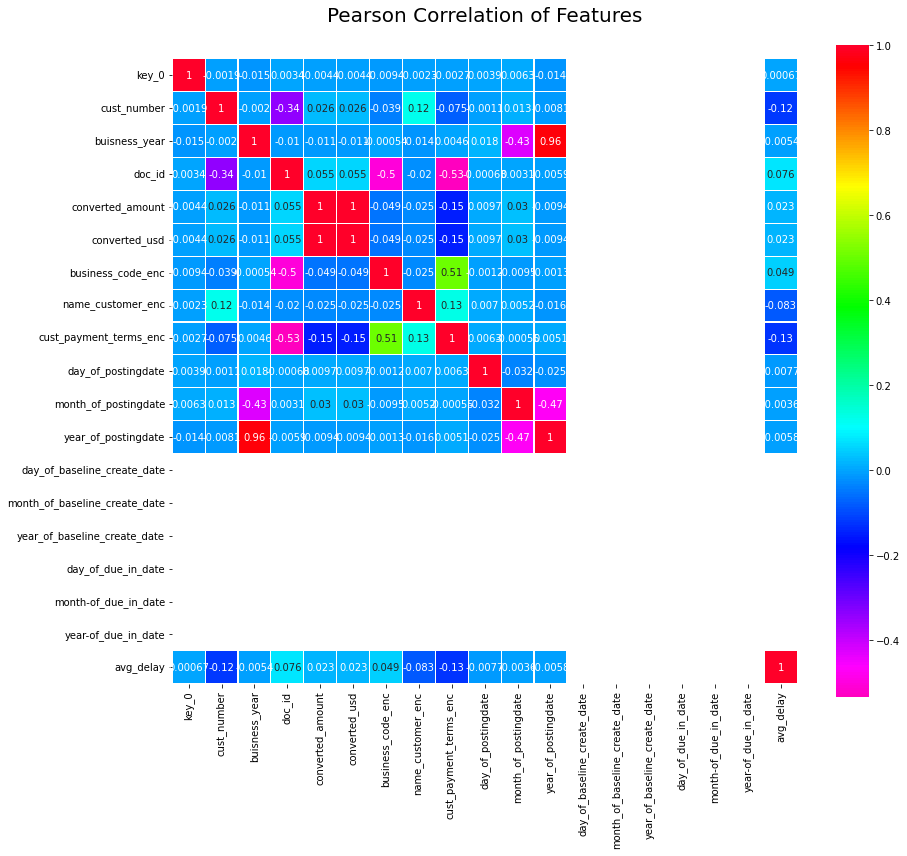

In [439]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [440]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [441]:
sel.variances_

array([1.73096954e+15, 1.16100201e-01, 8.13617218e+16, 1.33223780e+09,
       1.33223780e+09, 2.80596482e-01, 1.05187609e+06, 1.23314110e+02,
       7.59077911e+01, 1.23199874e+01, 1.16288980e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [443]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [444]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- month_of_due_in_date
- year_of_due_in_date
Feature names seen at fit time, yet now missing:
- month-of_due_in_date
- year-of_due_in_date

  warnings.warn(message, FutureWarning)


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [445]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [446]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- day-of_due_in_date
- month_of_due_in_date
- year_of_due_in_date
Feature names seen at fit time, yet now missing:
- day_of_due_in_date
- month-of_due_in_date
- year-of_due_in_date

  warnings.warn(message, FutureWarning)


25622.822440821943

### Display The Comparison Lists

In [447]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[707515376.5628538],[0.029891935764608912],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists


### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists


## You need to make the comparison list into a comparison dataframe 

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

### Calculate the R2 score for test

### Calculate the R2 score for Validation

### Calculate the Accuracy for train Dataset 

### Calculate the accuracy for validation

### Calculate the accuracy for test

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

### Check for the number of rows and columns in the nulldata

### Check the Description and Information of the nulldata 

### Storing the Nulldata into a different dataset 
# for BACKUP

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

### Check the information of the "nulldata" dataframe

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

### Now you can pass this dataset into you final model and store it into "final_result"

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

### Check for the Number of Rows and Columns in your "Final" dataframe 

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins= ___________________
labels =__________________________
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

### Display the count of each categoty of new "Aging Bucket" column 

### Display your final dataset with aging buckets 

### Store this dataframe into the .csv format

# END OF THE PROJECT